In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit, minimize

In [58]:
df = pd.read_csv("src/co_2_series.csv", sep=";", comment="#")

In [59]:

df['T'] = df['t'].apply(lambda s: re.match("(-?\d\d?):(\d\d(.\d+)?)", s).groups())
df

,t,T
0,0:00,"(0, 00, None)"
1,0:18.3,"(0, 18.3, .3)"
2,0:37,"(0, 37, None)"
3,0:55,"(0, 55, None)"
4,1:13,"(1, 13, None)"
5,1:32,"(1, 32, None)"
6,1:48,"(1, 48, None)"
7,2:07,"(2, 07, None)"
8,2:25,"(2, 25, None)"
9,2:42,"(2, 42, None)"


In [60]:
df['s'] = df['T'].apply(lambda t: int(t[0])*60 + float(t[1]))

(array([ 5.5577442 , -8.25733272]), array([0.00758704, 3.09412502]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
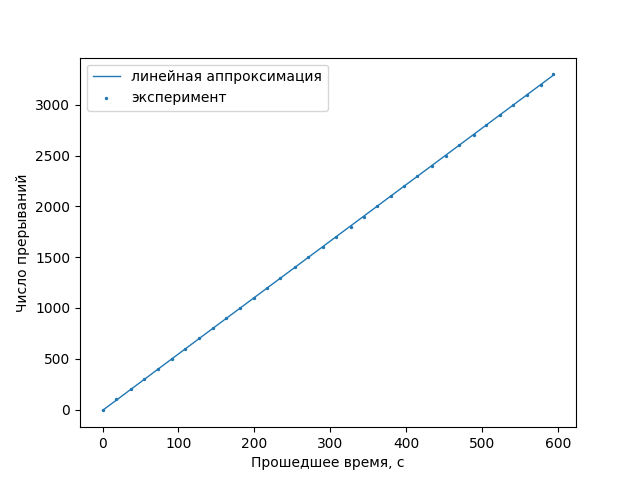

In [80]:
%matplotlib widget

plt.scatter(df['s'], np.arange(0, len(df['s'])) * 100, s=2, label="эксперимент")

f = lambda x, a, b: a*x + b
res, err = curve_fit(f, df['s'][10:],  np.arange(10, len(df['s'])) * 100, maxfev=10_000)

plt.plot(df['s'], f(df['s'], *res), lw=1, label="линейная аппроксимация")
plt.ylabel("Число прерываний")
plt.xlabel("Прошедшее время, с")
plt.legend()
plt.savefig("CO2.png", dpi=300)

res, np.sqrt(np.diag(err))

In [70]:
5.5577442 # 2ν = N/t = 2/T; T = 2/(2ν)
2/5.5577442

0.35985823169047615

In [33]:
5 + None

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'